In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import re

from tqdm.notebook import tqdm

# initialize pandas apply progress bar
tqdm.pandas()

In [2]:
# names of the submission files, which indicate the LB score
NAMES = ['212_v2', '212', '218', '219', '221']

# Read Submissions

In [3]:
# debugging variable to select a subset of each submission
n = int(10e10)

print('Reading 212 v2...')
submission_212_v2 = pd.read_csv('../input/bms-submissions/submission_2.12_v2.csv').head(n)
submission_212_v2.rename({ 'InChI': 'InChI212_v2' }, axis=1, inplace=True)
submission_212_v2N = pd.read_csv('../input/bms-submissions/submission_norm_2.12_v2.csv').head(n)
submission_212_v2N.rename({ 'InChI': 'InChI212_v2N' }, axis=1, inplace=True)

print('Reading 212...')
submission_212 = pd.read_csv('../input/bms-submissions/submission_2.12.csv').head(n)
submission_212.rename({ 'InChI': 'InChI212' }, axis=1, inplace=True)
submission_212N = pd.read_csv('../input/bms-submissions/submission_norm_2.12.csv').head(n)
submission_212N.rename({ 'InChI': 'InChI212N' }, axis=1, inplace=True)

print('Reading 218...')
submission_218 = pd.read_csv('../input/bms-submissions/submission_2.18.csv').head(n)
submission_218.rename({ 'InChI': 'InChI218' }, axis=1, inplace=True)
submission_218N = pd.read_csv('../input/bms-submissions/submission_norm_2.18.csv').head(n)
submission_218N.rename({ 'InChI': 'InChI218N' }, axis=1, inplace=True)

print('Reading 219...')
submission_219 = pd.read_csv('../input/bms-submissions/submission_2.19.csv').head(n)
submission_219.rename({ 'InChI': 'InChI219' }, axis=1, inplace=True)
submission_219N = pd.read_csv('../input/bms-submissions/submission_norm_2.19.csv').head(n)
submission_219N.rename({ 'InChI': 'InChI219N' }, axis=1, inplace=True)

print('Reading 221...')
submission_221 = pd.read_csv('../input/bms-submissions/submission_2.21.csv').head(n)
submission_221.rename({ 'InChI': 'InChI221' }, axis=1, inplace=True)
submission_221N = pd.read_csv('../input/bms-submissions/submission_norm_2.21.csv').head(n)
submission_221N.rename({ 'InChI': 'InChI221N' }, axis=1, inplace=True)

print('Done Reading')

Reading 212 v2...
Reading 212...
Reading 218...
Reading 219...
Reading 221...
Done Reading


# Merge Submission

In [4]:
submission = pd.DataFrame({ 'image_id': submission_218['image_id'] })

# Adding 212_v2
submission = submission.merge(submission_212_v2, on='image_id')
submission = submission.merge(submission_212_v2N, on='image_id')

# Adding 212
submission = submission.merge(submission_212, on='image_id')
submission = submission.merge(submission_212N, on='image_id')

# Adding 218
submission = submission.merge(submission_218, on='image_id')
submission = submission.merge(submission_218N, on='image_id')

# Adding 219
submission = submission.merge(submission_219, on='image_id')
submission = submission.merge(submission_219N, on='image_id')

# Adding 221
submission = submission.merge(submission_221, on='image_id')
submission = submission.merge(submission_221N, on='image_id')

In [5]:
# For each submission file the original and normalized InChI are shown
display(submission.head())

,image_id,InChI212_v2,InChI212_v2N,InChI212,InChI212N,InChI218,InChI218N,InChI219,InChI219N,InChI221,InChI221N
0,2f6fc849ad8d,InChI=1S/C25H24N4O2S/c1-16-11-12-19(14-17(16)2...,InChI=1S/C25H24N4O2S/c1-16-11-12-19(14-17(16)2...,InChI=1S/C25H24N4O2S/c1-16-11-12-19(14-17(16)2...,InChI=1S/C25H24N4O2S/c1-16-11-12-19(14-17(16)2...,InChI=1S/C25H24N4O2S/c1-16-11-12-19(14-17(16)2...,InChI=1S/C25H24N4O2S/c1-16-11-12-19(14-17(16)2...,InChI=1S/C25H24N4O2S/c1-16-11-12-19(14-17(16)2...,InChI=1S/C25H24N4O2S/c1-16-11-12-19(14-17(16)2...,InChI=1S/C25H24N4O2S/c1-16-11-12-19(14-17(16)2...,InChI=1S/C25H24N4O2S/c1-16-11-12-19(14-17(16)2...
1,d9d1b70db6f2,InChI=1S/C14H20ClN3O2/c1-2-20-14(19)18-7-5-17(...,InChI=1S/C14H20ClN3O2/c1-2-20-14(19)18-7-5-17(...,InChI=1S/C14H20ClN3O2/c1-2-20-14(19)18-7-5-17(...,InChI=1S/C14H20ClN3O2/c1-2-20-14(19)18-7-5-17(...,InChI=1S/C14H20ClN3O2/c1-2-20-14(19)18-7-5-17(...,InChI=1S/C14H20ClN3O2/c1-2-20-14(19)18-7-5-17(...,InChI=1S/C14H20ClN3O2/c1-2-20-14(19)18-7-5-17(...,InChI=1S/C14H20ClN3O2/c1-2-20-14(19)18-7-5-17(...,InChI=1S/C14H20ClN3O2/c1-2-20-14(19)18-7-5-17(...,InChI=1S/C14H20ClN3O2/c1-2-20-14(19)18-7-5-17(...
2,2f6fdbe7d8db,"InChI=1S/C32H31F6N3O4/c33-31(34,35)23-15-21(16...","InChI=1S/C32H31F6N3O4/c33-31(34,35)23-15-21(16...","InChI=1S/C32H31F6N3O4/c33-31(34,35)23-15-21(16...","InChI=1S/C32H31F6N3O4/c33-31(34,35)23-15-21(16...","InChI=1S/C32H31F6N3O4/c33-31(34,35)23-15-21(16...","InChI=1S/C32H31F6N3O4/c33-31(34,35)23-15-21(16...","InChI=1S/C32H31F6N3O4/c33-31(34,35)23-15-21(16...","InChI=1S/C32H31F6N3O4/c33-31(34,35)23-15-21(16...","InChI=1S/C32H31F6N3O4/c33-31(34,35)23-15-21(16...","InChI=1S/C32H31F6N3O4/c33-31(34,35)23-15-21(16..."
3,d9d1c10fe3db,"InChI=1S/C14H24N2O2S/c1-4-5-6-12(3)16-19(17,18...","InChI=1S/C14H24N2O2S/c1-4-5-6-12(3)16-19(17,18...","InChI=1S/C14H24N2O2S/c1-4-5-6-12(3)16-19(17,18...","InChI=1S/C14H24N2O2S/c1-4-5-6-12(3)16-19(17,18...","InChI=1S/C14H24N2O2S/c1-4-5-6-12(3)16-19(17,18...","InChI=1S/C14H24N2O2S/c1-4-5-6-12(3)16-19(17,18...","InChI=1S/C14H24N2O2S/c1-4-5-6-12(3)16-19(17,18...","InChI=1S/C14H24N2O2S/c1-4-5-6-12(3)16-19(17,18...","InChI=1S/C14H24N2O2S/c1-4-5-6-12(3)16-19(17,18...","InChI=1S/C14H24N2O2S/c1-4-5-6-12(3)16-19(17,18..."
4,2f6fe5875533,InChI=1S/C12H22N4O/c1-5-9(6-2)16-11-10(13)12(1...,InChI=1S/C12H22N4O/c1-5-9(6-2)16-11-10(13)12(1...,InChI=1S/C12H22N4O/c1-5-9(6-2)16-11-10(13)12(1...,InChI=1S/C12H22N4O/c1-5-9(6-2)16-11-10(13)12(1...,InChI=1S/C12H22N4O/c1-5-9(6-2)16-11-10(13)12(1...,InChI=1S/C12H22N4O/c1-5-9(6-2)16-11-10(13)12(1...,InChI=1S/C12H22N4O/c1-5-9(6-2)16-11-10(13)12(1...,InChI=1S/C12H22N4O/c1-5-9(6-2)16-11-10(13)12(1...,InChI=1S/C12H22N4O/c1-5-9(6-2)16-11-10(13)12(1...,InChI=1S/C12H22N4O/c1-5-9(6-2)16-11-10(13)12(1...


In [6]:
# Check if we indeed have 1616107 rows
display(submission.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1616107 entries, 0 to 1616106
Data columns (total 11 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   image_id      1616107 non-null  object
 1   InChI212_v2   1616107 non-null  object
 2   InChI212_v2N  1616107 non-null  object
 3   InChI212      1616107 non-null  object
 4   InChI212N     1616107 non-null  object
 5   InChI218      1616107 non-null  object
 6   InChI218N     1616107 non-null  object
 7   InChI219      1616107 non-null  object
 8   InChI219N     1616107 non-null  object
 9   InChI221      1616107 non-null  object
 10  InChI221N     1616107 non-null  object
dtypes: object(11)
memory usage: 148.0+ MB


None

This next column decleration is important and will be used later on. The boolean indicates whether all normalized InChI's are equal in each submission, thus if all predictions are normalized to the same InChI.

In [7]:
submission['equal'] = (
    (submission['InChI212_v2N'] == submission['InChI212N']) &
    (submission['InChI212_v2N'] == submission['InChI218N']) &
    (submission['InChI212_v2N'] == submission['InChI219N']) &
    (submission['InChI212_v2N'] == submission['InChI221N'])
)

In [8]:
# Percentage where all submission are equal
percentage_equal = submission['equal'].sum() / len(submission) * 100
print(f'percentage_equal: {percentage_equal:.3f}%')

percentage_equal: 93.590%


These next percentages indicate how many InChI's were not valid and could therefore not be normalized. When normalizing the InChI's a non-valid InChI's would normally default to the predicted InChI. However for this method to work, non-valid InChI's need to be normalized to "error".

In [9]:
# Error rate in each submission
for n in NAMES:
    error_rate = len(submission.loc[submission[f'InChI{n}N'] == 'error']) / len(submission) * 100
    print(f'{n.ljust(6)} error rate: {error_rate:.3f}%')

212_v2 error rate: 6.639%
212    error rate: 6.660%
218    error rate: 6.899%
219    error rate: 6.940%
221    error rate: 6.996%


This next percentage shows where not all predicted InChI's could not be normalized, but at least one could. This is an indication of the expected improvement. Intuively, a normalizable InChI has a higher chance of being the correct prediction, as a non-normalizable InChI is by definition a non-existing molecule and therefore incorrect. A normalizable InChI could be the correct InChI.

In [10]:
# Submission where some, but not all, have an error
error_sums = (
    (submission['InChI212_v2N'] == 'error').astype(int) +
    (submission['InChI212N'] == 'error').astype(int) +
    (submission['InChI218N'] == 'error').astype(int) +
    (submission['InChI219N'] == 'error').astype(int) +
    (submission['InChI221N'] == 'error').astype(int)
)
non_overlapping_error_ratio = sum((error_sums < len(NAMES)) & (error_sums > 0)) / len(submission) * 100
print(f'Non overlapping error ratio: {non_overlapping_error_ratio:.3f}%')

Non overlapping error ratio: 2.249%


# Submission Selection Process

In [11]:
submission_final_dict = dict()
# Selection Statistics
selection_stats = dict({
    '12_v2': 0,
    '12': 0,
    '18': 0,
    '19': 0,
    '21': 0,
    'e': 0,
})

for idx, row in tqdm(submission.iterrows(), total=len(submission)):
    # All Equal and not error, use submission
    if row['equal'] and row['InChI212_v2N'] != 'error':
        submission_final_dict[row['image_id']] = row['InChI212_v2N']
    # else, choose best submission without error
    else:
        # Choose best normalized submission without error
        if row['InChI212_v2N'] != 'error':
            selection_stats['12_v2'] += 1
            submission_final_dict[row['image_id']] = row['InChI212_v2N']
        elif row['InChI212N'] != 'error':
            selection_stats['12'] += 1
            submission_final_dict[row['image_id']] = row['InChI212N']
        elif row['InChI218N'] != 'error':
            selection_stats['18'] += 1
            submission_final_dict[row['image_id']] = row['InChI218N']
        elif row['InChI219N'] != 'error':
            selection_stats['19'] += 1
            submission_final_dict[row['image_id']] = row['InChI219N']
        elif row['InChI221N'] != 'error':
            selection_stats['21'] += 1
            submission_final_dict[row['image_id']] = row['InChI221N']
        # if none could be normalized use best submission
        else:
            selection_stats['e'] += 1
            submission_final_dict[row['image_id']] = row['InChI212_v2']

  0%|          | 0/1616107 [00:00<?, ?it/s]

This pie chart shown the selection statistics. As expected, the selection process prefers high scoring submission. This can be explained by the order of the selection. Around half of the selections default to the best scoring prediction, as no prediction could be normalized. This indicates there is room for improvement, as these predictions are incorrect.

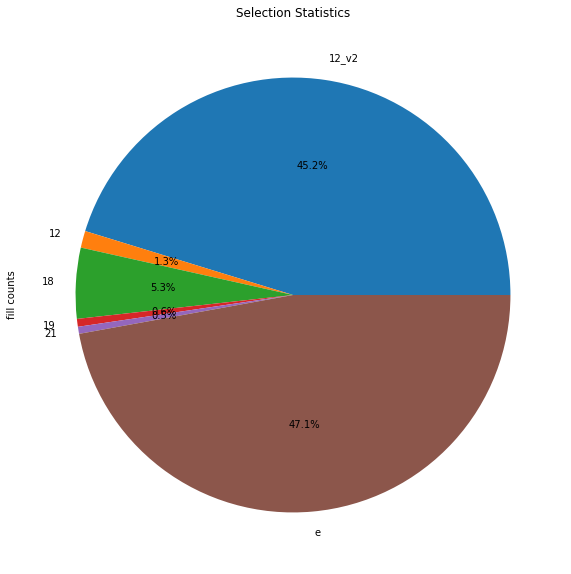

In [12]:
# Show Selection Statistics
plt.figure(figsize=(10,10))
pd.Series(selection_stats, name='fill counts').plot.pie(y='fill count', title='Selection Statistics', legend=False, autopct='%1.1f%%')
pass

In [13]:
display(pd.Series(selection_stats).to_frame(name='fill counts'))

,fill counts
12_v2,88673
12,2451
18,10300
19,1141
21,1025
e,92376


# Make DataFrame

In [14]:
# Transform dictionary to dataframe
submission_final = pd.DataFrame.from_dict(submission_final_dict, orient='index', columns=['InChI'])
# Set the index_name to 'image_id' as required by the submission format
submission_final.index.name = 'image_id'

# Remove \p and \q from submission

In [15]:
removed_pq_parts = 0

def remove_pq(InChI, debug=False):
    global removed_pq_parts
    
    InChI_Original = InChI
    # P
    substr_p = re.findall('(?<=\/p)[^\/]*', InChI)
    if len(substr_p) > 0:
        for substr in substr_p:
            removed_pq_parts += 1
            InChI = InChI.replace(f'/p{substr}', '')
    # Q
    substr_q = re.findall('(?<=\/q)[^\/]*', InChI)
    if len(substr_q) > 0:
        for substr in substr_q:
            removed_pq_parts += 1
            InChI = InChI.replace(f'/q{substr}', '')
            
    if debug and (len(substr_p) > 0 or len(substr_q) > 0):
        print('=' * 50)
        print(InChI_Original)
        print(InChI)
        print('=' * 50)
        
    return InChI

In [16]:
# Remove /p and /q parts as they are not present in the training set
submission_final['InChI'] = submission_final['InChI'].progress_apply(remove_pq)

  0%|          | 0/1616107 [00:00<?, ?it/s]

In [17]:
# Show statistics about /p /q removal
print(f'Total number of removed parts: {removed_pq_parts}')
removed_pq_parts_percentage = removed_pq_parts / len(submission_final) * 100
print(f'Mean percentage of InChI\'s with /p or /q part removed: {removed_pq_parts_percentage:.3f}%')

Total number of removed parts: 380
Mean percentage of InChI's with /p or /q part removed: 0.024%


# Submission to CSV

In [18]:
# Show submission head
display(submission_final.head())

,InChI
image_id,
2f6fc849ad8d,InChI=1S/C25H24N4O2S/c1-16-11-12-19(14-17(16)2...
d9d1b70db6f2,InChI=1S/C14H20ClN3O2/c1-2-20-14(19)18-7-5-17(...
2f6fdbe7d8db,"InChI=1S/C32H31F6N3O4/c33-31(34,35)23-15-21(16..."
d9d1c10fe3db,"InChI=1S/C14H24N2O2S/c1-4-5-6-12(3)16-19(17,18..."
2f6fe5875533,InChI=1S/C12H22N4O/c1-5-9(6-2)16-11-10(13)12(1...


In [19]:
# Check if there are 1616107 rows!!!
display(submission_final.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1616107 entries, 2f6fc849ad8d to be20b2bc8e86
Data columns (total 1 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   InChI   1616107 non-null  object
dtypes: object(1)
memory usage: 89.2+ MB


None

In [20]:
# write submission file to CSV
submission_final.to_csv('submission.csv', index=True)